In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_tf = pd.read_csv("/content/drive/MyDrive/projeto/tf_rotulado.csv", sep=',')
df_tw = pd.read_csv("/content/drive/MyDrive/projeto/twitts_rotulado.csv", sep=';')
#df_idf = pd.read_csv("/content/drive/MyDrive/projeto/idf_rotulado.csv",sep=";")
#df_idftf = pd.read_csv("/content/drive/MyDrive/projeto/idftf_rotulado.csv",sep=";")

In [ ]:
df_tw

,Unnamed: 0,Tweets,classificacao
0,0,Essa notícia só me deu mais força para subir v...,positivo
1,1,"En la segunda vuelta golea a Bolsonaro, en la ...",negativo
2,2,Normally I would just say this is desperate bu...,positivo
3,3,"#PTNuncaMais “Vencemos a mentira no 1° turno, ...",negativo
4,4,"Nojento, é Bolsonaro segundo turno",negativo
...,...,...,...
3531,3531,a burocracia para abrir a conta do nubank em o...,positivo
3532,3532,hoje eu realmente jurei que ia acordar cedo pa...,negativo
3533,3533,pois nesse eu precisarei de amigos cobaias par...,negativo
3534,3534,"mulher faça isso não, simone é uma latifundiár...",positivo


In [ ]:
df_tf_X = df_tf.drop(columns=['Unnamed: 0','classificacao'])

In [ ]:
df_tf_X_train, df_tf_X_test, df_tf_y_train, df_tf_y_test = train_test_split(df_tf_X, df_tf['classificacao'], test_size=0.33, random_state=42)

In [ ]:
df_tf_xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(df_tf_X_train, df_tf_y_train)

In [ ]:
df_tf_pred = df_tf_xgb.predict(df_tf_X_test)

In [ ]:
y_true = df_tf_y_test
y_pred = df_tf_pred

print('recall_macro:' + str(recall_score(y_true, y_pred, average='macro')))

print('recall_micro:' + str(recall_score(y_true, y_pred, average='micro')))

print('precision_macro:' + str(precision_score(y_true, y_pred, average='macro')))

print('precision_micro:' + str(precision_score(y_true, y_pred, average='micro')))

print('precion_weighted:' + str(precision_score(y_true, y_pred, average='weighted')))

print('f1_score_macro:' + str(f1_score(y_true, y_pred, average='macro')))

print('f1_score_micro:' + str(f1_score(y_true, y_pred, average='micro')))

print('f1_score_weighted:' + str(f1_score(y_true, y_pred, average='weighted')))

recall_macro:0.49455638542079705
recall_micro:0.5715509854327335
precision_macro:0.508743262485695
precision_micro:0.5715509854327335
precion_weighted:0.567999489279163
f1_score_macro:0.4985704840262781
f1_score_micro:0.5715509854327335
f1_score_weighted:0.566533474058615


In [ ]:
rf_tf = RandomForestClassifier(max_depth=2, random_state=0).fit(df_tf_X_train, df_tf_y_train)
df_tf_rf_pred = rf_tf.predict(df_tf_X_test)

In [ ]:
y_true = df_tf_y_test
y_pred = df_tf_rf_pred

print('recall_macro:' + str(recall_score(y_true, y_pred, average='macro')))

print('recall_micro:' + str(recall_score(y_true, y_pred, average='micro')))

print('precision_macro:' + str(precision_score(y_true, y_pred, average='macro')))

print('precision_micro:' + str(precision_score(y_true, y_pred, average='micro')))

print('precion_weighted:' + str(precision_score(y_true, y_pred, average='weighted')))

print('f1_score_macro:' + str(f1_score(y_true, y_pred, average='macro')))

print('f1_score_micro:' + str(f1_score(y_true, y_pred, average='micro')))

print('f1_score_weighted:' + str(f1_score(y_true, y_pred, average='weighted')))

recall_macro:0.34158075601374566
recall_micro:0.4755784061696658
precision_macro:0.49004329004329006
precision_micro:0.4755784061696658
precion_weighted:0.6343449181495454
f1_score_macro:0.22928857005401074
f1_score_micro:0.4755784061696658
f1_score_weighted:0.3176609047035216


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Com base no resultado de todos os modelos em cada vetor, decidimos aplicar o modelo de xgb no tf de twittes novos.

In [ ]:
with open ("/content/drive/MyDrive/projeto/tweets3.txt", encoding='UTF-8') as f:
  tw = f.read()
tw3 = tw.split(';')

df_tw3 = pd.DataFrame(tw3)

In [ ]:
df_tw3_ajust = df_tw3.drop_duplicates()

In [ ]:
df_tw3_ajust2 = df_tw3_ajust.reset_index()
df_tw3_ajust2 = df_tw3_ajust2.drop(columns=['index'], axis = 0)
df_tw3_ajust2 = df_tw3_ajust2.rename(columns={0:'Tweets'})

In [ ]:
tamanho = []
for linha in df_tw3_ajust2['Tweets']:
    fras_sep = linha.split()
    tam = len(fras_sep)
    tamanho.append(tam)
  
df_tw3_ajust2['tamanho'] = tamanho

In [ ]:
df_tw3_ajust3 = df_tw3_ajust2.loc[df_tw3_ajust2 ['tamanho'] > 3 ]
df_tw3_ajust4 = df_tw3_ajust3.reset_index()
df_tw3_ajust5 = df_tw3_ajust4.drop(columns=['tamanho','index'], axis = 0)

In [ ]:
vectorizer = TfidfVectorizer(use_idf=False)

In [ ]:
df_tf = vectorizer.fit_transform(df_tw3_ajust5['Tweets'])

In [ ]:
with open ("/content/drive/MyDrive/projeto/tweets_novos.txt", encoding='UTF-8') as f:
  tw = f.read()
tw3 = tw.split(';')

df_tw3 = pd.DataFrame(tw3)

In [ ]:
df_tw3_ajust = df_tw3.drop_duplicates()

In [ ]:
df_tw3_ajust2 = df_tw3_ajust.reset_index()
df_tw3_ajust2 = df_tw3_ajust2.drop(columns=['index'], axis = 0)
df_tw3_ajust2 = df_tw3_ajust2.rename(columns={0:'Tweets'})

In [ ]:
tamanho = []
for linha in df_tw3_ajust2['Tweets']:
    fras_sep = linha.split()
    tam = len(fras_sep)
    tamanho.append(tam)

In [ ]:
df_tw3_ajust2['tamanho'] = tamanho

In [ ]:
df_tw3_ajust3 = df_tw3_ajust2.loc[df_tw3_ajust2 ['tamanho'] > 3 ]
df_tw3_ajust4 = df_tw3_ajust3.reset_index()
df_tw3_ajust5 = df_tw3_ajust4.drop(columns=['tamanho','index'], axis = 0)

In [ ]:
df_tw3_ajust5

,Tweets
0,"No hay diferencias entre Maduro, Bolsonaro, Tr..."
1,TÔ DESCONFIADO QUE ESSA JANJA E UM TRAVECO KKKKK
2,Só isso?\nFizeram muito mais contra Bolsonaro ...
3,"minha vizinha nojenta batendo aqui em casa, ap..."
4,"Bolsonaro, quando elogia Ustra, está elogiando..."
...,...
1812,Acho que não vale apena tentar convencer a mud...
1813,"O povo só está querendo o código fonte , só is..."
1814,"Faz um favor então, avisa o Xadão que ele e o ..."
1815,"Eu nem sigo esta vergonha, fica aparecendo…."


In [ ]:
df_tf_novos = vectorizer.transform(df_tw3_ajust5['Tweets'])

In [ ]:
df_tf_novos2 = pd.DataFrame(df_tf_novos.toarray())

In [ ]:
df_tf_novos2.columns = vectorizer.get_feature_names_out()

In [ ]:
df_tf_X

,00,000,01,02,029,03,039,04,041,05,...,𝑎𝑙𝑖𝑛ℎ𝑎𝑑𝑜,𝑐𝑜𝑚,𝑑𝑒𝑐𝑙𝑎𝑟𝑜𝑢,𝑗𝑎,𝑗𝑢𝑠𝑡𝑖𝑓𝑖𝑐𝑎𝑡𝑖𝑣𝑎,𝑙𝑎𝑑𝑟𝑎,𝑚𝑎𝑖𝑠,𝑚𝑒𝑖𝑜,𝑛𝑜,𝑣𝑜𝑡𝑜
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tf_novos2

,00,000,01,02,029,03,039,04,041,05,...,𝑎𝑙𝑖𝑛ℎ𝑎𝑑𝑜,𝑐𝑜𝑚,𝑑𝑒𝑐𝑙𝑎𝑟𝑜𝑢,𝑗𝑎,𝑗𝑢𝑠𝑡𝑖𝑓𝑖𝑐𝑎𝑡𝑖𝑣𝑎,𝑙𝑎𝑑𝑟𝑎,𝑚𝑎𝑖𝑠,𝑚𝑒𝑖𝑜,𝑛𝑜,𝑣𝑜𝑡𝑜
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_tf_novos2_pred = df_tf_xgb.predict(df_tf_novos2)

In [ ]:
df_tf_novos2['classificacao'] = df_tf_novos2_pred 

In [ ]:
df_tf_novos2_negativo = df_tf_novos2.loc[df_tf_novos2['classificacao'] == 'negativo']

In [ ]:
df_tw3_ajust5['classificacao'] = df_tf_novos2_pred

In [ ]:
df_tw3_ajust5

,Tweets,classificacao
0,"No hay diferencias entre Maduro, Bolsonaro, Tr...",negativo
1,TÔ DESCONFIADO QUE ESSA JANJA E UM TRAVECO KKKKK,neutro
2,Só isso?\nFizeram muito mais contra Bolsonaro ...,negativo
3,"minha vizinha nojenta batendo aqui em casa, ap...",neutro
4,"Bolsonaro, quando elogia Ustra, está elogiando...",negativo
...,...,...
1812,Acho que não vale apena tentar convencer a mud...,positivo
1813,"O povo só está querendo o código fonte , só is...",negativo
1814,"Faz um favor então, avisa o Xadão que ele e o ...",negativo
1815,"Eu nem sigo esta vergonha, fica aparecendo….",positivo


In [ ]:
tweet_novos_negativo = df_tw3_ajust5.loc[df_tw3_ajust5['classificacao'] == 'negativo']
tweet_novos_positivo = df_tw3_ajust5.loc[df_tw3_ajust5['classificacao'] == 'positivo']
tweet_novos_neutro = df_tw3_ajust5.loc[df_tw3_ajust5['classificacao'] == 'neutro']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

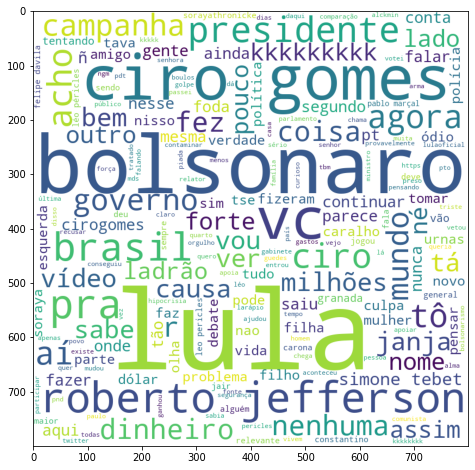

In [ ]:
comment_words = ''
stopwords = set(nltk.corpus.stopwords.words())
for val in tweet_novos_neutro['Tweets']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

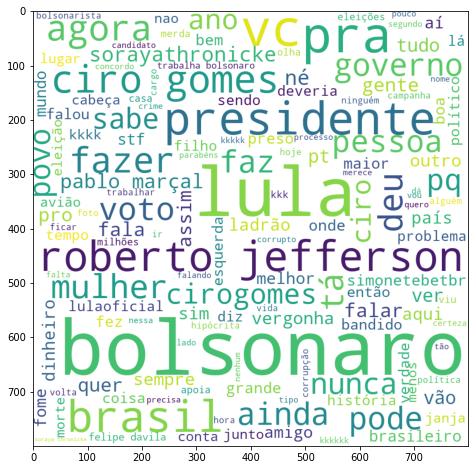

In [ ]:
comment_words = ''
stopwords = set(nltk.corpus.stopwords.words())
for val in tweet_novos_negativo['Tweets']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

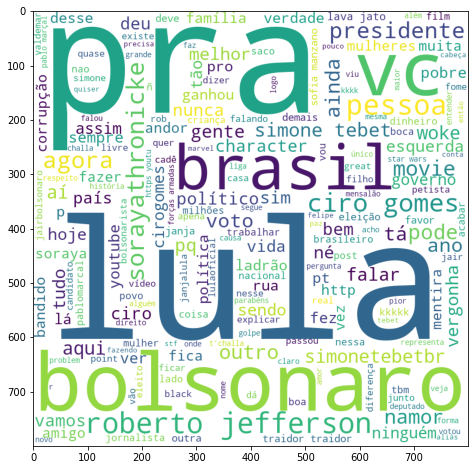

In [ ]:
comment_words = ''
stopwords = set(nltk.corpus.stopwords.words())

for val in tweet_novos_positivo['Tweets']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

In [ ]:
a = tweet_novos_negativo.sample(3)

In [ ]:
b = tweet_novos_positivo.sample(3)

In [ ]:
c = tweet_novos_neutro.sample(3)

In [ ]:
m = pd.concat([a,b,c])

In [ ]:
m

,Tweets,classificacao
155,A Janja \n@JanjaLula\n é a mulher da vez no Br...,negativo
1650,"Mas vc sabe que o Lula não tem esse poder, não...",negativo
402,Tenha esperança no que o bolsonaro vai fazer n...,negativo
797,Ciro não tem moral pra falar de corrupção nem ...,positivo
305,You can’t possibly be comparing these characte...,positivo
1265,A sina de Constantino é passar vergonha: 1 Hum...,positivo
249,Acho que sou silenciada por ela...,neutro
778,Queria que ele fosse no do imperador? No do Pa...,neutro
1079,#SorayaBBB23 #SimoneTebet\n\nA Simone vai part...,neutro


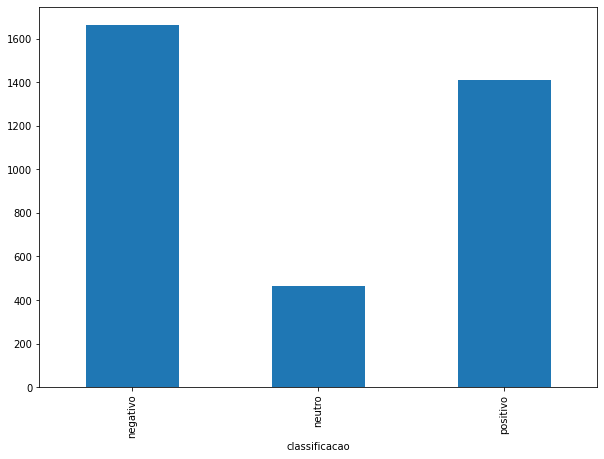

In [ ]:
df_tw.groupby('classificacao').size().plot(kind='bar', figsize=(10,7))

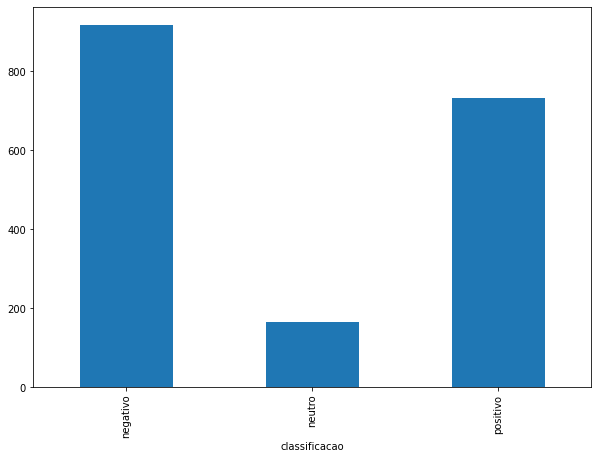

In [ ]:
df_tw3_ajust5.groupby('classificacao').size().plot(kind='bar', figsize=(10,7))

In [ ]:
df_tw3_ajust5

,Tweets,classificacao,cont
0,"No hay diferencias entre Maduro, Bolsonaro, Tr...",negativo,1
1,TÔ DESCONFIADO QUE ESSA JANJA E UM TRAVECO KKKKK,neutro,1
2,Só isso?\nFizeram muito mais contra Bolsonaro ...,negativo,1
3,"minha vizinha nojenta batendo aqui em casa, ap...",neutro,1
4,"Bolsonaro, quando elogia Ustra, está elogiando...",negativo,1
...,...,...,...
1812,Acho que não vale apena tentar convencer a mud...,positivo,1
1813,"O povo só está querendo o código fonte , só is...",negativo,1
1814,"Faz um favor então, avisa o Xadão que ele e o ...",negativo,1
1815,"Eu nem sigo esta vergonha, fica aparecendo….",positivo,1
